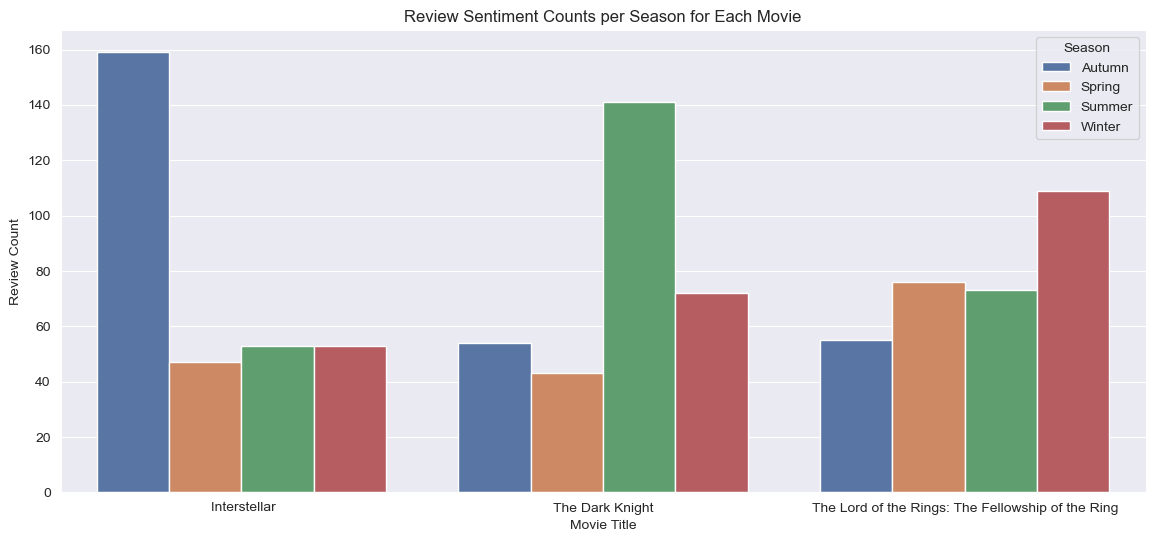

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Read the data
data = pd.read_excel('/users/IR/IMDBMovies.xlsx')

# Parse the Review_Date field into separate year and month columns
data['Review_Date'] = pd.to_datetime(data['Review_Date'])
data['Year'] = data['Review_Date'].dt.year
data['Month'] = data['Review_Date'].dt.month

# Assign a season to each month
data['Season'] = data['Month'].apply(get_season)

# Filter data for the given movies
movies = ['The Dark Knight', ' Interstellar', 'The Lord of the Rings: The Fellowship of the Ring']
filtered_data = data[data['Movie_Title'].isin(movies)]

# Group the data by Movie_Title, Season, and Review_Sentiment, and count the number of reviews for each group
grouped_data = filtered_data.groupby(['Movie_Title', 'Season', 'Review_Sentiment']).size().reset_index(name='Review_Count')

# Pivot the grouped_data dataframe for better plotting
pivot_data = grouped_data.pivot_table(index=['Movie_Title', 'Season'], columns='Review_Sentiment', values='Review_Count').reset_index()

# Create a bar chart using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(14, 6))

ax = sns.barplot(
    x='Movie_Title',
    y='total',
    hue='Season',
    data=pivot_data.assign(total=pivot_data.select_dtypes(include='number').sum(axis=1)),
    ci=None,
    palette='deep',
    capsize=.2,
    dodge=True
)

# Update layout
ax.set_xlabel('Movie Title')
ax.set_ylabel('Review Count')
ax.set_title('Review Sentiment Counts per Season for Each Movie')

# Show the chart
plt.show()
